<a href="https://colab.research.google.com/github/pynchmeister/practiceKeras/blob/master/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Preprocessing
You may have already seen the usage of the following, but they are ubiquitous: 
* to_categorical
* normalize

In [0]:
# Generate dummy data
import numpy as np 
data = np.random.random((2,5))
labels = np.random.randint(3, size=(2,3))

data, labels

(array([[0.1564446 , 0.76539444, 0.56837598, 0.20835714, 0.87304067],
        [0.96759629, 0.86209482, 0.4443027 , 0.56370063, 0.25200052]]),
 array([[0, 1, 2],
        [0, 0, 2]]))

In [0]:
from keras.utils import to_categorical, normalize

to_categorical(labels, num_classes=4)

Using TensorFlow backend.


array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)

In [0]:
normalize(data, order=1)

array([[0.06083521, 0.29763207, 0.22101927, 0.08102197, 0.33949149],
       [0.31316888, 0.27902263, 0.14380148, 0.1824454 , 0.08156162]])

# Sequence Preprocessing
The next set of tools is speciifc to sequences, and really useful for RNNs:
* pad_sequences: Transform a list of num_samples sequences (lists of scalars) into a 2D Numpy array of shape (num_samples, num_timesteps). num_timestamps is either the maxlen argument if provided, or the length of the longest sequence otherwise. Seqeuences that are shorter than num_timesteps are padded with value at the end. Sequences longer than num_timesteps are truncated so that it fits the desired length. Position where padding or truncation happens is determined by padding or truncating respectively.
* skipgrams: Transforms a sequence of word indexes (list of int) into couples of the form:
  * (word, word in the same window), with label 1 (positive samples).
  * (word, random word from the vocabulary), with label 0 (negative samples).


In [0]:
sequences = [
    [1,2,4,4],
    [3],
    [5,6,4,2,1,7,7,4,3],
    [3,3,4,3,2]
]

In [0]:
from keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(sequences, maxlen=None, dtype='int32',
                                padding='pre',truncating='post',value=0.)

padded_sequences

array([[0, 0, 0, 0, 0, 1, 2, 4, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 3],
       [5, 6, 4, 2, 1, 7, 7, 4, 3],
       [0, 0, 0, 0, 3, 3, 4, 3, 2]], dtype=int32)

In [0]:
from keras.preprocessing.sequence import skipgrams 

grams = skipgrams(padded_sequences[0], vocabulary_size=8,
                 window_size=1, negative_samples=1., shuffle=True,
                 categorical=False)

grams

([[1, 1],
  [2, 4],
  [4, 7],
  [4, 2],
  [2, 5],
  [4, 4],
  [4, 5],
  [2, 6],
  [2, 1],
  [4, 1],
  [1, 2],
  [4, 4]],
 [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

# Text preprocessing
We are starting to get a bit more complex. Realize the output of text preprocessing can be fed to sequence preprocessing. There are three important functions here:

* text_to_word_sequence: Split a sentence into a list of words.
* one_hot: One-hot encode a text into a list of word indexes in a vocabulary of size n.
* Tokenizer: Class for vectorizing texts, and/or turning texts into sequences (=list of word indexes, where the word of rank I in the dataset (starting at 1) has index I)

In [0]:
text = """"
    My Name is Harris
    I like data science.
    Let's do deep learning.
    Keras, my fave lib.
    """

In [0]:
from keras.preprocessing.text import text_to_word_sequence

words = text_to_word_sequence(text, lower=True, split=" ")

words

['my',
 'name',
 'is',
 'harris',
 'i',
 'like',
 'data',
 'science',
 "let's",
 'do',
 'deep',
 'learning',
 'keras',
 'my',
 'fave',
 'lib']

In [0]:
# we can change the filter chars too
text_to_word_sequence(text, filters="'", lower=True, split=" ")

['"\n',
 'my',
 'name',
 'is',
 'harris\n',
 'i',
 'like',
 'data',
 'science.\n',
 'let',
 's',
 'do',
 'deep',
 'learning.\n',
 'keras,',
 'my',
 'fave',
 'lib.\n']

In [0]:
from keras.preprocessing.text import one_hot

one_hot (text, n=8, lower=True, split=" ")

[1, 6, 4, 2, 2, 5, 3, 7, 2, 2, 7, 1, 4, 1, 7, 1]

In [0]:
from keras.preprocessing.text import Tokenizer 

tokenizer = Tokenizer(num_words=None, lower=True, split=" ")

In [0]:
# tokenizer.fit_on_sequence
tokenizer.fit_on_texts([text])

In [0]:
tokenizer.texts_to_sequences([text])

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 14, 15]]

In [0]:
tokenizer.texts_to_matrix([text], 'count')

array([[0., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [0]:
tokenizer.texts_to_matrix(['Data Science is fun'], 'count')

array([[0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.]])

# Image Preprocessing
The image preprocessing is considerably more complex, but comprises only a single function:

* ImageDataGenerator: Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches) indefinitely.

So we will go over this carefully

In [0]:
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt

%matplotlib inline

dataset = load_sample_images()

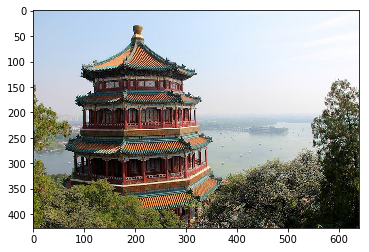

In [0]:
plt.imshow(dataset.images[0])

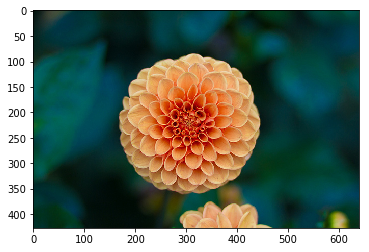

In [0]:
plt.imshow(dataset.images[1])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(featurewise_center=False,
                        samplewise_center=False,
                        featurewise_std_normalization=False,
                        samplewise_std_normalization=False,
                        zca_whitening=False,
                        rotation_range=10.,
                        width_shift_range=0.,
                        height_shift_range=0.,
                        shear_range=0.,
                        zoom_range=0.,
                        fill_mode='nearest',
                        cval=0.,
                        horizontal_flip=True,
                        vertical_flip=True,
                        rescale=None,
                        preprocessing_function=None)

In [0]:
idg.fit(dataset.images)

In [0]:
import numpy
it = idg.flow(numpy.array(dataset.images), numpy.array([1,1]), batch_size=1)

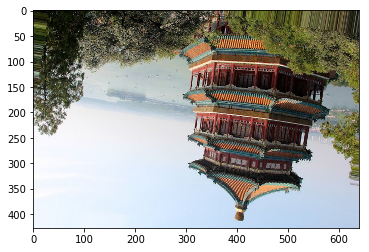

In [0]:
plt.imshow(numpy.array(next(it)[0][0, :, :, :], dtype='uint8'))